In [1]:
from arcgis.gis import GIS
gis = GIS('https://python.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

<Item title:"Multispectral Landsat" type:Imagery Layer owner:esri_livingatlas>
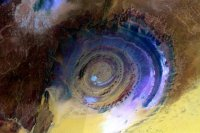

In [2]:
landsat_item = gis.content.search('Multispectral Landsat', 'Imagery Layer', outside_org=True)[0]
landsat_item

In [3]:
landsat = landsat_item.layers[0]
from arcgis.geocoding import geocode
area = geocode('Houston, TX', out_sr=landsat.properties.spatialReference)[0]

#### Query for images within Houston area

In [4]:
from arcgis.geometry import Geometry
houston_mask = Geometry(area['extent'])

In [5]:
samples = landsat.get_samples(houston_mask, sample_count=50,
        out_fields='AcquisitionDate,OBJECTID,GroupName,Category,SunAzimuth,SunElevation,CloudCover')

In [6]:
import datetime
import pandas as pd
column_names = 'AcquisitionDate,OBJECTID,GroupName,Category,SunAzimuth,SunElevation,CloudCover'.split(',')

sample_list = []
for s in samples:
    sa = s['attributes']
    sa['AcquisitionDate'] = datetime.datetime.fromtimestamp(sa['AcquisitionDate'] /1000).strftime("Acquisition Date: %d %b, %Y")
    sample_list.append(sa)
    
pd.DataFrame.from_records(sample_list)

,AcquisitionDate,Category,CloudCover,GroupName,OBJECTID,SunAzimuth,SunElevation
0,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
1,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
2,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
3,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
4,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
5,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
6,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
7,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
8,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093
9,"Acquisition Date: 15 May, 2017",1,0.0263,LC80260392017135LGN00_MTL,494747,115.3955,67.65093


In [7]:
import arcgis
houston_mask2=arcgis.geometry.filters.intersects(area['extent'])
houston_mask2

{'geometry': {"xmin": -10657358.467838574, "ymin": 3425835.95968719, "xmax": -10575649.96159631, "ymax": 3519959.6268186974},
 'geometryType': 'esriGeometryEnvelope',
 'spatialRel': 'esriSpatialRelIntersects'}

In [13]:
houston_images = landsat.filter_by(where="(Category = 1) AND (CloudCover <=0.05)",geometry=houston_mask2)

In [31]:
fs = houston_images.query(out_fields="AcquisitionDate, GroupName, Best, CloudCover, WRS_Row, WRS_Path, Month, Name", 
              return_geometry=True,
              return_distinct_values=False,
              order_by_fields="AcquisitionDate")

In [32]:
df = fs.df

In [33]:
df['Time'] = pd.to_datetime(df['AcquisitionDate'], unit='ms')
df[df['Time']>'2017']

,AcquisitionDate,Best,CloudCover,GroupName,Month,Name,OBJECTID,Shape_Area,Shape_Length,WRS_Path,WRS_Row,SHAPE,Time
61,1483808220956,2974039,0.0028,LC80260392017007LGN00_MTL,1,LC80260392017007LGN00,432864,4.674592e+10,865257.080242,26,39,"{'rings': [[[-10594553.9348, 3628079.675399996...",2017-01-07 16:57:00.956
62,1485190615958,1974039,0.0021,LC80260392017023LGN00_MTL,1,LC80260392017023LGN00,440366,4.672499e+10,865045.873150,26,39,"{'rings': [[[-10594155.8991, 3628022.622599996...",2017-01-23 16:56:55.958
63,1485190639858,974040,0.0006,LC80260402017023LGN00_MTL,1,LC80260402017023LGN00,440367,4.542443e+10,852936.562047,26,40,"{'rings': [[[-10637651.1392, 3443021.448799997...",2017-01-23 16:57:19.858
64,1490115017590,1975039,0.0110,LC80250392017080LGN00_MTL,3,LC80250392017080LGN00,467120,4.671626e+10,864974.705100,25,39,"{'rings': [[[-10421548.5373, 3628045.210699998...",2017-03-21 16:50:17.590
65,1490115041482,2975040,0.0042,LC80250402017080LGN00_MTL,3,LC80250402017080LGN00,466640,4.540637e+10,852780.465270,25,40,"{'rings': [[[-10465017.3718, 3443222.240299999...",2017-03-21 16:50:41.482
66,1494867375639,974039,0.0263,LC80260392017135LGN00_MTL,5,LC80260392017135LGN00,494747,4.663367e+10,864186.156378,26,39,"{'rings': [[[-10591588.6796, 3627636.264499999...",2017-05-15 16:56:15.639
67,1495644610753,975039,0.0147,LC80250392017144LGN00_MTL,5,LC80250392017144LGN00,499758,4.663924e+10,864234.789318,25,39,"{'rings': [[[-10420706.4895, 3627620.685800001...",2017-05-24 16:50:10.753
68,1495644634648,1975040,0.0036,LC80250402017144LGN00_MTL,5,LC80250402017144LGN00,499759,4.536138e+10,852318.574631,25,40,"{'rings': [[[-10464184.8972, 3442699.591300003...",2017-05-24 16:50:34.648
69,1503939068356,975040,0.0122,LC80250402017240LGN00_MTL,8,LC80250402017240LGN00,545774,4.534731e+10,852184.652872,25,40,"{'rings': [[[-10464316.5429, 3442696.361199997...",2017-08-28 16:51:08.356


In [18]:
m = gis.map('Houston, TX', 7)
display(m)
# m.add_layer(selected.last())

In [24]:
m.add_layer(pre_harvey)

In [35]:
m2 = gis.map('Houston, TX', 7)
display(m2)

In [36]:
m2.add_layer(post_harvey)

In [76]:
i1 = houston_images.first()

In [34]:
pre_harvey = landsat.filter_by('OBJECTID=499759')
post_harvey = landsat.filter_by('OBJECTID=466640')

In [79]:
from arcgis.raster.functions import *

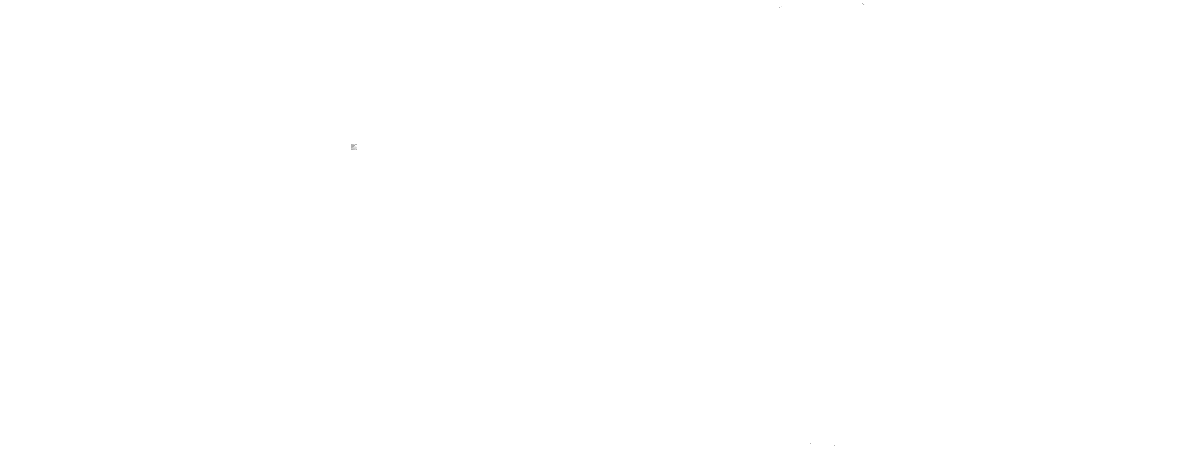

In [80]:
diff = pre_harvey - post_harvey
diff

In [81]:
m3 = gis.map('Houston, TX')
m3

In [83]:
m3.add_layer(diff2)

In [82]:
diff2 = stretch(diff,stretch_type='Sigmoid',dra=True, astype='u8')